In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class PolynomialFeatures(object):

  def __init__(self, degree):
    self.degree = degree

  def transform(self, x):
    feature = np.array([x ** i for i in range(self.degree + 1)])
    return np.transpose(feature)
  

In [38]:
class BayesianRegression(object):

  def __init__(self, alpha=0.1, beta=0.25):
    self.alpha = alpha
    self.beta = beta

  def fit(self, X, t):
    S_inv = self.alpha*np.eye(X.shape[1]) + self.beta*np.dot(X.T, X)
    self.w_var = np.linalg.pinv(S_inv)
    self.w_mean = self.beta * self.w_var.dot(X.T.dot(t))
    
  def predict(self, X):
    y = X.dot(self.w_mean)
    y_var = 1/self.beta + np.sum(X.dot(self.w_var) * X, axis=1)
    y_std = np.sqrt(y_var)
    return y, y_std

In [12]:
def create_data(func, low=0, high=1, size=10, sigma=1):
  x = np.random.uniform(low, high,size=size)
  y = func(x) + np.random.normal(0, sigma,size=len(x))
  return x, y

In [6]:
def func(x):
  return np.sin(2 * np.pi * x)

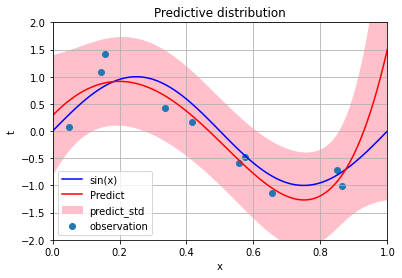

In [55]:
x, t = create_data(func, low=0, high=1, size=10, sigma=0.25)
X = x
features = PolynomialFeatures(degree=5)

regression = BayesianRegression(alpha=1e-3, beta=2)
x = features.transform(x)
regression.fit(x, t)

x_test = np.linspace(0,1,100)
X_test = features.transform(x_test)
y, y_std = regression.predict(X_test)

plt.plot(x_test, func(x_test), color="b", label="sin(x)")
plt.plot(x_test, y, color="r", label="Predict")
plt.fill_between(x_test, y - y_std, y + y_std, color="pink", label="predict_std")
plt.scatter(X, t,marker='o', label='observation')
plt.legend()
plt.title("Predictive distribution")
plt.xlabel("x")
plt.ylabel("t")
plt.xlim(0,1)
plt.ylim(-2,2)
plt.grid()
plt.show()